<h2>Data Loading and Preparation:</h2>

In [2]:
import pandas as pd

# Load data
data = pd.read_csv('sales_data.csv', parse_dates=['Date'], index_col='Date')

# Prepare data
data = data.asfreq('D').fillna(0)  # Fill missing dates with zero sales

<h2>Build the Model</h2>

In [13]:
from statsmodels.tsa.arima.model import ARIMA


# Define and fit the model
model = ARIMA(data['Sales'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


<h2>Generate Predictions:</h2>

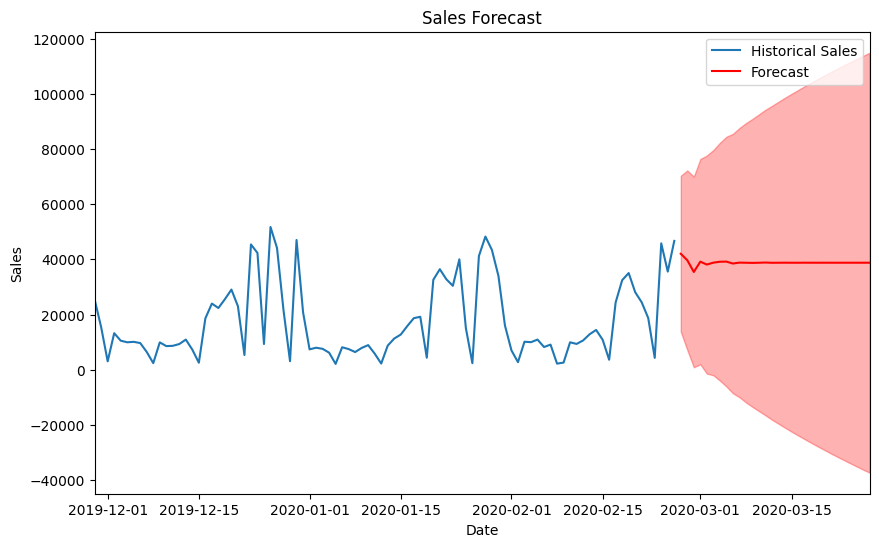

In [15]:
# Plot historical data and forecasts
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')

# Zoom in on the forecast period
plt.xlim(data.index[-90], forecast_index[-1])  # Adjust the xlim to zoom in on the last 90 days + forecast period

plt.show()